<a href="https://colab.research.google.com/github/johnsonadam187/binance_trader_app/blob/Dev/Binance_trader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authentication


In [1]:
api_key = 'Buw50cp1iDCVR9ErLEgSsn2Y0Yk4ToVH1tbsZxQO2FLJOxdkgKwzTyui4tHx60vl'
secret_key  = 'UkW9eYi3X47Q0Pi1ZER6OK80vBmzX7cIXtpCqBI4FSGrzQIwyuKC00aPemBHmQ3K'

In [2]:
!pip install python-binance mplfinance 

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 71kB 2.5MB/s 
     |████████████████████████████████| 1.3MB 12.2MB/s 
     |████████████████████████████████| 286kB 27.0MB/s 
     |████████████████████████████████| 184kB 33.2MB/s 
     |████████████████████████████████| 112kB 37.2MB/s 
     |████████████████████████████████| 143kB 39.8MB/s 
     |████████████████████████████████| 296kB 40.3MB/s 


In [3]:
import pandas as pd
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

In [4]:
client = Client(api_key, secret_key)

Get Data


In [5]:
tickers = client.get_all_tickers()
print(tickers)

[{'symbol': 'ETHBTC', 'price': '0.06299500'}, {'symbol': 'LTCBTC', 'price': '0.00437000'}, {'symbol': 'BNBBTC', 'price': '0.00908300'}, {'symbol': 'NEOBTC', 'price': '0.00125700'}, {'symbol': 'QTUMETH', 'price': '0.00361900'}, {'symbol': 'EOSETH', 'price': '0.00205400'}, {'symbol': 'SNTETH', 'price': '0.00002932'}, {'symbol': 'BNTETH', 'price': '0.00158500'}, {'symbol': 'BCCBTC', 'price': '0.07908100'}, {'symbol': 'GASBTC', 'price': '0.00019750'}, {'symbol': 'BNBETH', 'price': '0.14411000'}, {'symbol': 'BTCUSDT', 'price': '40008.27000000'}, {'symbol': 'ETHUSDT', 'price': '2520.53000000'}, {'symbol': 'HSRBTC', 'price': '0.00041400'}, {'symbol': 'OAXETH', 'price': '0.00017780'}, {'symbol': 'DNTETH', 'price': '0.00002801'}, {'symbol': 'MCOETH', 'price': '0.00577200'}, {'symbol': 'ICNETH', 'price': '0.00166300'}, {'symbol': 'MCOBTC', 'price': '0.00021140'}, {'symbol': 'WTCBTC', 'price': '0.00001974'}, {'symbol': 'WTCETH', 'price': '0.00023700'}, {'symbol': 'LRCBTC', 'price': '0.00000763'},

In [10]:
df1 = pd.DataFrame(tickers)
df1.set_index('symbol', inplace=True)
df1

,price
symbol,
ETHBTC,0.06299500
LTCBTC,0.00437000
BNBBTC,0.00908300
NEOBTC,0.00125700
QTUMETH,0.00361900
...,...
MATICTRY,13.65000000
ETCGBP,40.79000000
SOLGBP,27.97000000


In [35]:
def get_depth_df(Client, name="ETHBTC"):
  depth = Client.get_order_book(symbol=name)
  df_bids = pd.DataFrame(depth['bids'])
  df_bids.columns = ['Bid_Price', 'Bid_Volume']
  df_asks = pd.DataFrame(depth['asks'])
  df_asks.columns = ['Ask_Price', 'Ask_Volume']
  bids_and_asks = pd.concat([df_bids, df_asks], axis=1)
  bids_and_asks.index = pd.DataFrame(depth)['lastUpdateId']
  for column in bids_and_asks.columns:
    bids_and_asks[column] = pd.to_numeric(bids_and_asks[column])
  return bids_and_asks


In [36]:
df_btc = get_depth_df(client, 'BTCUSDT')
df_btc

,Bid_Price,Bid_Volume,Ask_Price,Ask_Volume
lastUpdateId,,,,
11735904329,40081.93,0.878046,40081.94,0.025991
11735904329,40080.41,0.014916,40083.69,0.125205
11735904329,40080.01,0.018171,40083.70,0.000621
11735904329,40079.99,0.018148,40084.00,0.003083
11735904329,40079.78,0.449134,40084.48,0.226471
...,...,...,...,...
11735904329,40051.39,0.377762,40115.02,0.008777
11735904329,40051.14,0.002986,40115.33,0.000462
11735904329,40051.10,0.120000,40115.48,0.298240


In [48]:
def get_historic_data(Client, name='BTCUSDT', interval = Client.KLINE_INTERVAL_1DAY, date='1 Jan 2011'):
  history = Client.get_historical_klines(name, interval, date)
  df_cols = ['Open time', 'Open', 'High', "Low", 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'buy base asset volume', 'buy quote asset volume', 'Ignore']
  history_df = pd.DataFrame(history)
  history_df.columns = df_cols
  for column in history_df.columns:
    history_df[column] = pd.to_numeric(history_df[column])
  return history_df

In [49]:
btc_history = get_historic_data(client)
btc_history

,Open time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,buy base asset volume,buy quote asset volume,Ignore
0,1502928000000,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395
1,1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409
2,1503100800000,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529
3,1503187200000,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084
4,1503273600000,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1623456000000,37331.98,37463.63,34600.36,35546.11,87717.549990,1623542399999,3.132387e+09,1719650,42571.205313,1.520433e+09,0.000000
1396,1623542400000,35546.12,39380.00,34757.00,39020.57,86921.025555,1623628799999,3.208992e+09,1894103,45675.273616,1.688611e+09,0.000000
1397,1623628800000,39020.56,41064.05,38730.00,40516.29,108522.391949,1623715199999,4.320308e+09,2185089,53645.908744,2.135286e+09,0.000000
1398,1623715200000,40516.28,41330.00,39506.40,40144.04,80679.622838,1623801599999,3.247747e+09,1931890,39428.829726,1.587382e+09,0.000000


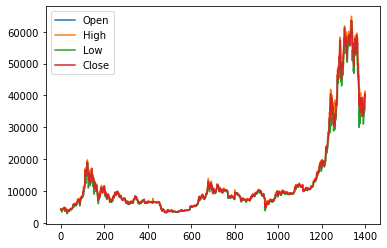

In [55]:
btc_history.iloc[:, 1:5].plot()